In [27]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
import pandas as pd
import warnings
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
PlottingFormat_Folder = '/home/sheffieldlab/Desktop/NoReward/Scripts/PlottingTools/'
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf

In [29]:
from define_attentivelaps import LoadData, Bayes_Attention, CommonFunctions

In [30]:
DirectoryName = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/'
BayesFolder = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/BayesResults_All/'

['CFC17', 'NR14', 'NR15', 'NR23', 'CFC4', 'NR6', 'CFC19', 'NR24', 'NR21', 'CFC16']


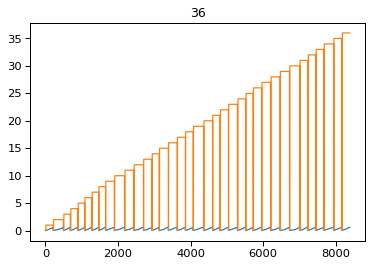

9.99758892471618
CFC17 Task1 36 (36,) (36,) (35,)
CFC17 Task2 36 (36,) (36,) (35,)


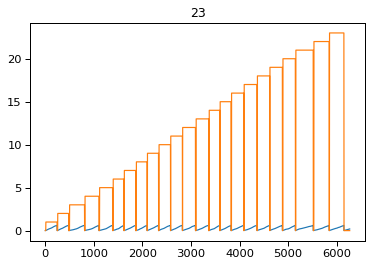

11.257676795691818
NR14 Task1 30 (30,) (30,) (29,)
NR14 Task2 23 (23,) (23,) (22,)
NR14 Task3 20 (20,) (20,) (19,)
NR14 Task4 20 (20,) (20,) (19,)


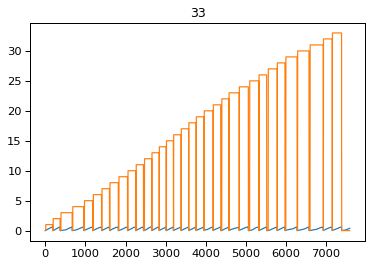

9.27743586629421
NR15 Task1 34 (34,) (34,) (33,)
NR15 Task2 33 (33,) (33,) (32,)


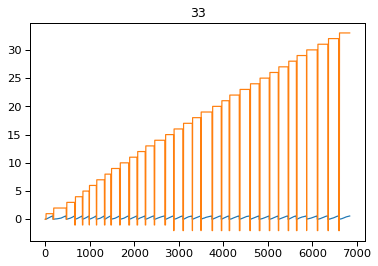

8.003002539339551
NR23 Task1 40 (40,) (40,) (39,)
NR23 Task2 33 (33,) (33,) (32,)
NR23 Task3 37 (37,) (37,) (36,)
NR23 Task4 49 (49,) (49,) (48,)


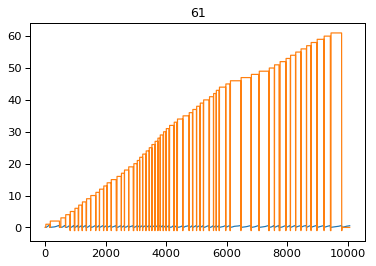

6.841794421046103
CFC4 Task1 39 (39,) (39,) (38,)
CFC4 Task2 61 (61,) (61,) (60,)
CFC4 Task3 37 (37,) (37,) (36,)
CFC4 Task4 41 (41,) (41,) (40,)


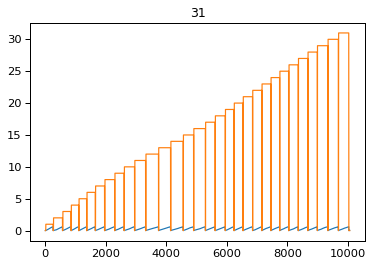

12.786737082807106
NR6 Task1 43 (43,) (43,) (42,)
NR6 Task2 31 (31,) (31,) (30,)
NR6 Task3 25 (25,) (25,) (24,)
NR6 Task4 33 (33,) (33,) (32,)


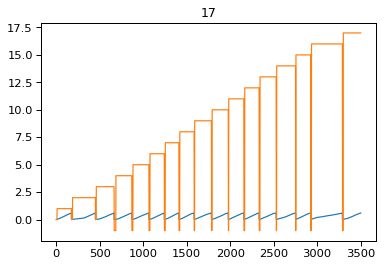

9.01374320526816
CFC19 Task1 36 (36,) (36,) (35,)
CFC19 Task2 17 (17,) (17,) (16,)


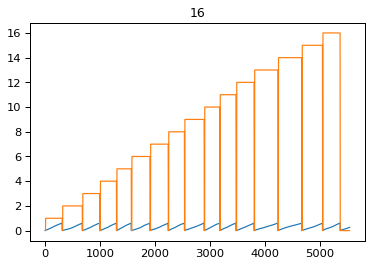

13.028556431989488
NR24 Task1 27 (27,) (27,) (26,)
NR24 Task2 16 (16,) (16,) (15,)
NR24 Task3 22 (22,) (22,) (21,)
NR24 Task4 25 (25,) (25,) (24,)


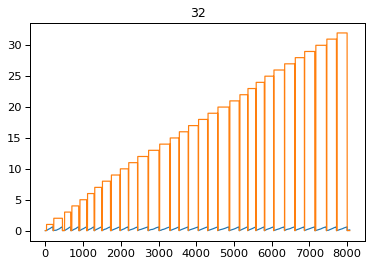

10.597074968356406
NR21 Task1 40 (40,) (40,) (39,)
NR21 Task2 32 (32,) (32,) (31,)
NR21 Task3 22 (22,) (22,) (21,)
NR21 Task4 20 (20,) (20,) (19,)


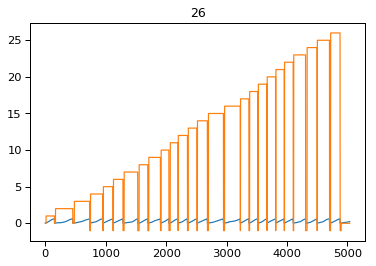

12.901545157813725
CFC16 Task1 31 (31,) (31,) (30,)
CFC16 Task2 26 (26,) (26,) (25,)


In [42]:
at = Bayes_Attention(DirectoryName, BayesFolder)

In [43]:
at.animalname

['CFC17',
 'NR14',
 'NR15',
 'NR23',
 'CFC4',
 'NR6',
 'CFC19',
 'NR24',
 'NR21',
 'CFC16']

## Plot speed heatmap

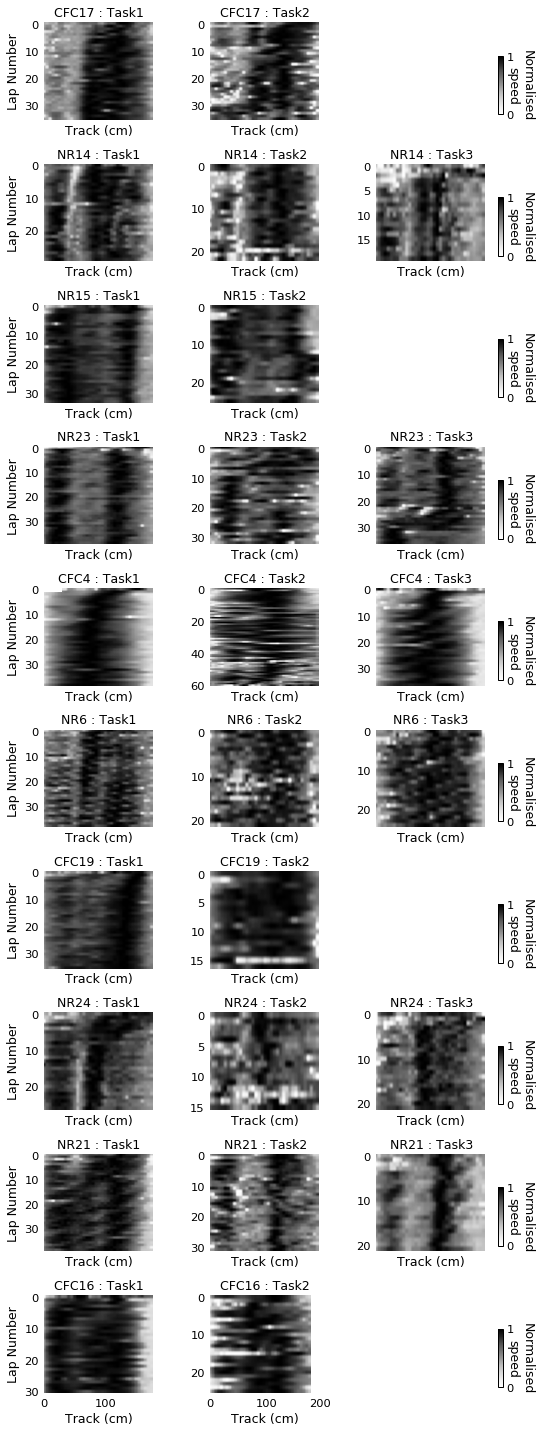

In [44]:
fs, ax = plt.subplots(len(at.animalname), 3, figsize=(7, 20), sharex='all')
for n, a in enumerate(at.animalname):
    at.plot_velocity_inspace(fs, ax[n, :], a, taskstoplot=['Task1', 'Task2', 'Task3'])
fs.tight_layout()

## Plot cumulative speed ratio

In [45]:
#Get slope from dark behavior
Darkdatafolder = '/home/sheffieldlab/Desktop/NoReward/Dark/SaveAnalysed'
darkvel = np.load(os.path.join(Darkdatafolder, 'velocity_in_space.npz'), allow_pickle=True)

In [46]:
speed_ratio_dark = []
for a in darkvel['animalname']:
    speed_ratio_dark.extend(darkvel['speed_ratio'].item()[a])

In [47]:
#Get slope from experimental tasks
taskstoplot =['Task1', 'Task2']
speed_ratio_exp = {k:[] for k in taskstoplot}
for a in at.animalname:
    for t in taskstoplot:
        speed_ratio_exp[t].extend(at.speed_ratio[a][t])

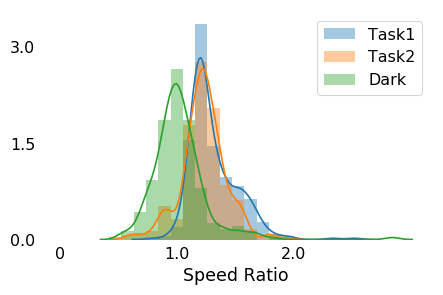

In [48]:
fs, ax = plt.subplots(1, dpi=100)
sns.distplot(speed_ratio_exp['Task1'], bins=np.linspace(0, 2, 20),
             kde=True, ax=ax, label='Task1')
sns.distplot(speed_ratio_exp['Task2'], bins=np.linspace(0, 2, 20),
             kde=True, ax=ax, label='Task2')
sns.distplot(speed_ratio_dark, bins=np.linspace(0, 2, 20), kde=True, ax=ax, label='Dark')
ax.legend()
ax.set_xticks((0, 1.00, 2.00))
ax.set_xticklabels((0, 1.00, 2.00))
pf.set_axes_style(ax, numticks=3)
ax.set_xlabel('Speed Ratio');
fs.set_size_inches((5, 3))

In [49]:
t, p_value1 = scipy.stats.ks_2samp(speed_ratio_dark, speed_ratio_exp['Task1'])
t, p_value2 = scipy.stats.ks_2samp(speed_ratio_dark, speed_ratio_exp['Task2'])
t, p_value3 = scipy.stats.ks_2samp(speed_ratio_exp['Task1'], speed_ratio_exp['Task2'])
print('P-values: \n Dark with Task1 %0.3f \n Dark with Task2 %0.3f \n Task1 with Task2 %0.3f'%(p_value1, p_value2, p_value3))

P-values: 
 Dark with Task1 0.000 
 Dark with Task2 0.000 
 Task1 with Task2 0.005


### Amount of attention paid in each animal

Normality test for Task1 p-value 0.064
Normality test for Task2 p-value 0.015
P-value between Task1 and Task2 0.339
P-value between Task1 and Dark 0.001
P-value between Task2 and Dark 0.001


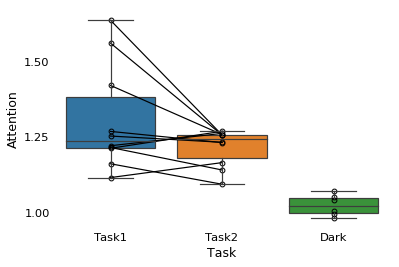

In [50]:
fs, ax = plt.subplots(1)
dict_sp = {k:[] for k in taskstoplot}

for t in taskstoplot:
    for a in at.animalname:
        dict_sp[t].append(np.mean(at.speed_ratio[a][t]))
    ks, p = scipy.stats.shapiro(dict_sp[t])
    print('Normality test for %s p-value %0.3f' % (t, p))
    
#P-value
t, p = scipy.stats.mannwhitneyu(dict_sp['Task1'], dict_sp['Task2'])
print('P-value between Task1 and Task2 %0.3f' %p)
df_sp = pd.DataFrame.from_dict(dict_sp)

for index, row in df_sp.iterrows():
    ax.plot([0, 1], row, 'ko-',  markerfacecolor='none')
df_sp = pd.melt(df_sp, value_name='Attention', var_name='Task')

#Dark boxplot
dark_mean = []
for a in darkvel['animalname']:
    dark_mean = np.mean(darkvel['speed_ratio'].item()[a])
    ax.plot(2, dark_mean, 'ko', markerfacecolor='none')
    df_sp = df_sp.append({'Task':'Dark', 'Attention':dark_mean}, ignore_index=True)
sns.boxplot(x='Task', y='Attention', data=df_sp, ax=ax)
pf.set_axes_style(ax, numticks=3)

t, p = scipy.stats.mannwhitneyu(dict_sp['Task1'], df_sp[df_sp.Task=='Dark']['Attention'])
print('P-value between Task1 and Dark %0.3f' %p)
t, p = scipy.stats.mannwhitneyu(dict_sp['Task2'], df_sp[df_sp.Task=='Dark']['Attention'])
print('P-value between Task2 and Dark %0.3f' %p)


## Plot ratio per animal

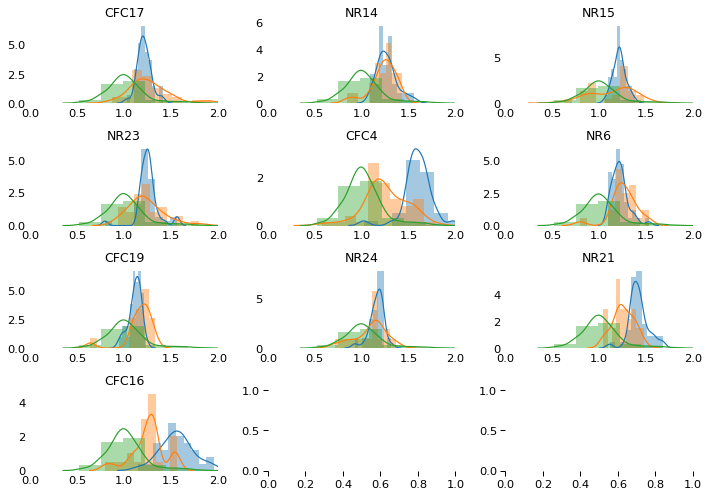

In [51]:
#Get slope from experimental tasks
taskstoplot =['Task1', 'Task2']
fs, ax = plt.subplots(4, 3, figsize=(10, 7))
ax = ax.flatten()
for n, a in enumerate(at.animalname):
    for t in taskstoplot:
        sns.distplot(at.speed_ratio[a][t], bins=10, ax=ax[n], label=t)
    sns.distplot(speed_ratio_dark, bins=10, ax=ax[n], label='Dark')
    ax[n].set_title(a)
    ax[n].set_xlim((0, 2))
    pf.set_axes_style(ax[n])

fs.tight_layout()

## Run with bayes error

In [52]:
df, df_p, attentive, notattentive, licklaps = at.calculate_attentive_non_attentive_laps(taskstoget=['Task1', 'Task2'], tol=0)

CFC17 Task2 : Total laps 36, Licklaps 5, NoLicklaps 30, Goodlaps 29, Worstlaps 1
NR14 Task2 : Total laps 23, Licklaps 8, NoLicklaps 14, Goodlaps 13, Worstlaps 1
NR15 Task2 : Total laps 26, Licklaps 9, NoLicklaps 23, Goodlaps 8, Worstlaps 9
NR23 Task2 : Total laps 33, Licklaps 5, NoLicklaps 27, Goodlaps 23, Worstlaps 4
CFC4 Task2 : Total laps 61, Licklaps 11, NoLicklaps 49, Goodlaps 46, Worstlaps 3
NR6 Task2 : Total laps 22, Licklaps 7, NoLicklaps 23, Goodlaps 14, Worstlaps 1
CFC19 Task2 : Total laps 17, Licklaps 6, NoLicklaps 10, Goodlaps 9, Worstlaps 1
NR24 Task2 : Total laps 16, Licklaps 3, NoLicklaps 12, Goodlaps 8, Worstlaps 4
NR21 Task2 : Total laps 32, Licklaps 5, NoLicklaps 26, Goodlaps 26, Worstlaps 0
CFC16 Task2 : Total laps 26, Licklaps 3, NoLicklaps 22, Goodlaps 20, Worstlaps 2


(10, 3)
Removing ouliers ['CFC4']
1
Multiple comparisons after removing Outliers
Normality test for Task1_goodlap p-value 0.195
Normality test for Task2_goodlap_withlicks p-value 0.127
Normality test for Task2_goodlap p-value 0.984
Performing Parametric test 

      Task1_goodlap Task2_goodlap_withlicks Task2_goodlap
CFC17      0.955166                0.796575      0.750536
NR14       0.924479                0.675386      0.619849
NR15       0.933079                 0.85906      0.829218
NR23       0.804377                0.802314       0.71582
NR6           0.972                0.935653      0.649367
CFC19      0.936799                0.900813      0.874869
NR24       0.846194                0.871501       0.78102
NR21       0.969149                0.909406      0.550674
CFC16       0.87299                0.904194      0.728328
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Bonf
alphacSidak=0.02, alphacBonf=0.017
    group1             group2           stat   pval  pval_corr rej

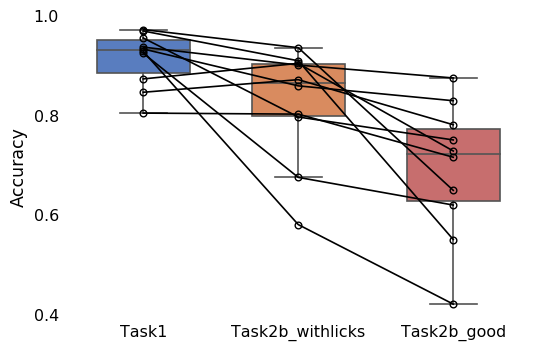

In [53]:
fs, ax = plt.subplots(1, dpi=100)
at.plot_boxplot_of_attention(ax, df, df_p)

Number of attentive laps 196, not attentive laps 26


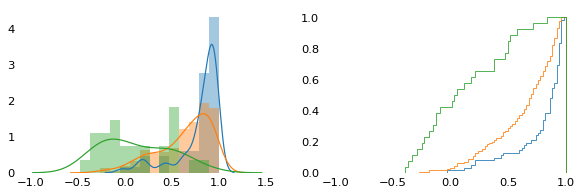

In [54]:
fs, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.distplot(licklaps, bins = np.linspace(-1, 1, 20), ax=ax[0])
sns.distplot(attentive, bins = np.linspace(-1, 1, 20), ax=ax[0])
sns.distplot(notattentive, bins = np.linspace(-1, 1, 20), ax=ax[0])
ax[1].hist(licklaps, bins = np.linspace(-1, 1, 100), cumulative=True, histtype='step', normed=True)
ax[1].hist(attentive, bins = np.linspace(-1, 1, 100), cumulative=True, histtype='step', normed=True)
ax[1].hist(notattentive, bins = np.linspace(-1, 1, 100), cumulative=True, histtype='step', normed=True)
for a in ax:
    pf.set_axes_style(a)
print('Number of attentive laps %d, not attentive laps %d' %(np.size(attentive), np.size(notattentive)))

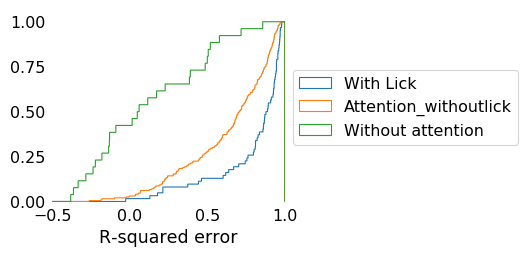

In [55]:
SaveFigureFolder = '/home/sheffieldlab/Desktop/NoReward/PaperFigures/Figure1/100dpi/Attention/'
fs, ax = plt.subplots(1, dpi=100)
ax.hist(licklaps, bins = np.linspace(-0.5, 1, 1000), cumulative=True, histtype='step', normed=True, label='With Lick')
ax.hist(attentive, bins = np.linspace(-0.5, 1, 1000), cumulative=True, histtype='step', normed=True, label='Attention_withoutlick')
ax.hist(notattentive, bins = np.linspace(-0.5, 1, 1000), cumulative=True, histtype='step', normed=True, label='Without attention');
ax.set_xticks((-0.5, 0, 0.5, 1))
ax.set_xlim((-0.5, 1))
ax.set_xlabel('R-squared error')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pf.set_axes_style(ax)
fs.set_size_inches((3, 2.5))
fs.savefig(os.path.join(SaveFigureFolder, 'Cumulative_withattention.pdf'), bbox_inches='tight', transparent=True)

In [56]:
t, p_value1 = scipy.stats.ks_2samp(licklaps, attentive)
t, p_value2 = scipy.stats.ks_2samp(licklaps, notattentive)
t, p_value3 = scipy.stats.ks_2samp(attentive, notattentive)
print('P-values: \n lick with attentive %0.3f \n lick with not attentive %0.3f \n attentive with not attentive %0.3f'%(p_value1, p_value2, p_value3))

P-values: 
 lick with attentive 0.000 
 lick with not attentive 0.000 
 attentive with not attentive 0.000


## Bayes error with slowing down

In [57]:
animallist = ['NR15', 'CFC19'] #Animals with no attentive laps   

(43,)
coefficient of determination: 0.706


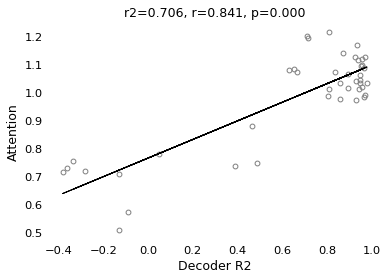

In [58]:
fs, ax = plt.subplots(1)
at.plot_scatter(ax, animallist)

## Plot scatter by attention

coefficient of determination: 0.089
coefficient of determination: 0.078
coefficient of determination: 0.134


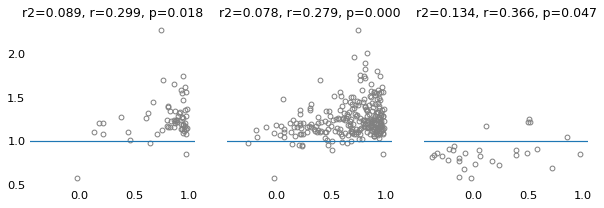

In [59]:
fs, ax = plt.subplots(1, 3, figsize=(10, 3), sharex='all', sharey='all')
at.plot_scatter_by_attention(ax)

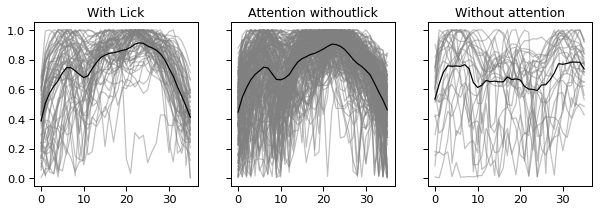

In [60]:
fs, ax = plt.subplots(1, 3, figsize=(10, 3), sharex='all', sharey='all')
at.plot_velocity_inspace_byattention(ax)

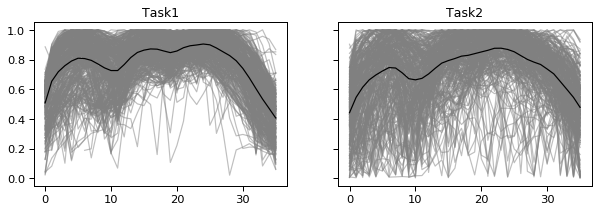

In [61]:
#Task1 and Task2
fs, ax = plt.subplots(1, 2, figsize=(10, 3), sharex='all', sharey='all')
at.plot_velocity_inspace_bytask(ax[0], 'Task1')
at.plot_velocity_inspace_bytask(ax[1], 'Task2')

## Task1

In [62]:
b = []
s = []
for a in at.animalname:
        b.extend(at.bayescompiled[a]['Task1'][-10:])
        s.extend(at.speed_ratio[a]['Task1'][-10:])

coefficient of determination: 0.000


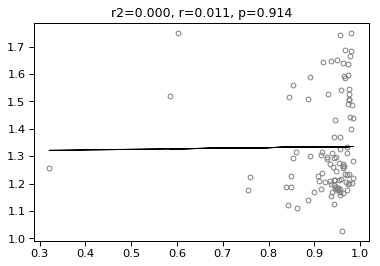

In [63]:
plt.plot(b, s, 'o', color='grey', markerfacecolor='none')
pearsonsr = scipy.stats.pearsonr(np.nan_to_num(b), np.nan_to_num(s))
y_pred_linearreg, rsquared = CommonFunctions.linear_regression(np.asarray(b),
                                                                       np.asarray(s))
plt.title('r2=%0.3f, r=%0.3f, p=%0.3f' % (rsquared, pearsonsr[0], pearsonsr[1]))
plt.plot(b, y_pred_linearreg, color='k', linewidth=1)